# Kaggle - Digit Recognizer

In [177]:
# Import required modules
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.python.framework import ops

## Data Understanding

In [119]:
# Import raw data

train_raw_df = pd.read_csv('./data/train.csv')
test_raw_df = pd.read_csv('./data/test.csv')

In [120]:
train_raw_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [121]:
train_raw_df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [122]:
X_train = (train_raw_df.iloc[:,1:].values).astype('float32')
y_train = train_raw_df.iloc[:,0].values.astype('int32')

X_test = test_raw_df.values.astype('float32')

In [123]:
# Shape of data
# We know the images are 28 x 28 pixels = 784 pixel per image and total 42000 images
print("Total shape of image", end="\t")
print(X_train.shape)
print("Number of images: ", end="\t")
print(X_train.shape[0])

Total shape of image	(42000, 784)
Number of images: 	42000


In [124]:
# Reshaping the data to m (number of examples), height and width
X_train = X_train.reshape(X_train.shape[0], 28, 28)

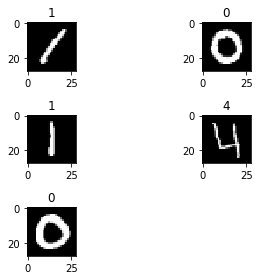

In [125]:
for i in range(0, 5):
    plt.subplot(320+(i+1)) # num_rows = 3, num_cols = 2, index position for image = (i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray')) # Image show
    plt.title(y_train[i])
    plt.tight_layout() # Adjust spacing between images

In [126]:
X_train.shape

(42000, 28, 28)

In [127]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) # To bring the shape (m, n_H, n_W, n_C)

In [128]:
print(X_test.shape)
print(y_train.shape)

(28000, 784)
(42000,)


In [129]:
# Reshaping X_test and y_train to required shapes
X_test = X_test.reshape(X_test.shape[0],28,28,1)
y_train = y_train.reshape(1,y_train.shape[0])

In [130]:
# Final shapes of the vectors
print("X Train shape: {}\nX Test shape: {}\ny train shape: {}".format(X_train.shape, X_test.shape, y_train.shape))


X Train shape: (42000, 28, 28, 1)
X Test shape: (28000, 28, 28, 1)
y train shape: (1, 42000)


y= 7


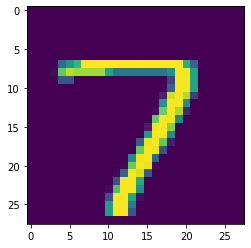

In [131]:
# Visualise some examples
index = 1234
plt.imshow(X_train[index,:,:,0]) # Default 0 for third index because these images are grayscale
print("y= "+str(np.squeeze(y_train[:,index])))

## Data Preprocessing

In [132]:
# Method to convert to one hot matrix
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [133]:
# Flatten out all the data in two dimensions. (28 x 28, m)
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T

# Normalize the vectors
X_train = X_train_flatten/255
X_test = X_test_flatten/255

# Convert labels to one_hot_matrix
y_train = convert_to_one_hot(y_train,10)

In [135]:
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))

number of training examples = 42000
number of test examples = 28000
X_train shape: (784, 42000)
Y_train shape: (10, 42000)
X_test shape: (784, 28000)


## Linear Model

In [136]:
# Create Placeholders
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "tf.float32"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "tf.float32"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    X = tf.compat.v1.placeholder(tf.float32, [n_x, None], name='X')
    Y = tf.compat.v1.placeholder(tf.float32, [n_y,None], name='Y')

    return X,Y

In [138]:
# Testing createPlaholder method
tf.compat.v1.disable_eager_execution()
X, Y = create_placeholders(784, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_3:0", shape=(784, None), dtype=float32)
Y = Tensor("Y_3:0", shape=(10, None), dtype=float32)


In [160]:
# Initialize Parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 784]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    xavier_initializer = tf.initializers.GlorotUniform()
    zeros_initializer = tf.initializers.Zeros()
    W1 = tf.Variable(xavier_initializer(shape = [42, 784]))
    b1 = tf.Variable(zeros_initializer(shape = [42, 1]))
    W2 = tf.Variable(xavier_initializer(shape = [20, 42]))
    b2 = tf.Variable(zeros_initializer(shape = [20, 1]))
    W3 = tf.Variable(xavier_initializer(shape = [10, 20]))
    b3 = tf.Variable(zeros_initializer(shape = [10, 1]))
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }

    return parameters

In [161]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'Variable:0' shape=(42, 784) dtype=float32>
b1 = <tf.Variable 'Variable_1:0' shape=(42, 1) dtype=float32>
W2 = <tf.Variable 'Variable_2:0' shape=(20, 42) dtype=float32>
b2 = <tf.Variable 'Variable_3:0' shape=(20, 1) dtype=float32>


In [162]:
# Forward Propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)

    return Z3

In [163]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, None), dtype=float32)


In [164]:
# Compute Cost

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """

    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

    return cost

In [165]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [166]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [167]:
# Model
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.0001, num_epochs=1500, minibatch_size = 32, print_cost=True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    ops.reset_default_graph()
    (n_x,m) = X_train.shape
    seed = 3
    n_y = Y_train.shape[0]
    costs = []

    X,Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.compat.v1.global_variables_initializer()
    with tf.compat.v1.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m/minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={
                    X:minibatch_X,
                    Y:minibatch_Y
                })
                epoch_cost+=minibatch_cost/minibatch_size
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [169]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_val, y_train, y_val = train_test_split(X_train.T, y_train.T, test_size=0.10, random_state=42)

In [171]:
X_train.shape

(784, 42000)

In [172]:
y_train.shape

(10, 42000)

Cost after epoch 0: 39.942329
Cost after epoch 100: 0.833688
Cost after epoch 200: 0.041561
Cost after epoch 300: 0.001280
Cost after epoch 400: 0.007210
Cost after epoch 500: 0.000064
Cost after epoch 600: 0.000019
Cost after epoch 700: 0.000003
Cost after epoch 800: 0.000000
Cost after epoch 900: 0.007949
Cost after epoch 1000: 0.000000
Cost after epoch 1100: 0.000001
Cost after epoch 1200: 0.000004
Cost after epoch 1300: 0.000000
Cost after epoch 1400: 0.000000


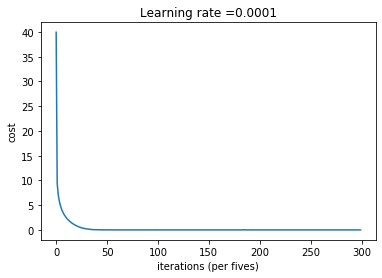

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.95857143


In [178]:
parameters = model(X_train.T, y_train.T, X_val.T, y_val.T)

In [179]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [784, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction